# Time Period: 20140930-20141231


In [2]:
import pandas as pd
import glob
import os
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

### 1. BE/ME Ratio in 2014 (same throughout the year)
The size breakpoint for year t is the median NYSE market equity at the end of June of year t. BE/ME for June of year t is the book equity for the last fiscal year end in t-1 divided by ME for December of t-1. 

In [3]:
AShareEODDerivativeIndicator = pd.read_csv("/Users/yiliwang/Documents/ACR Internship/Supplementary datasets/EODDerivativeIndicator.csv", header=0)

In [4]:
BEME_ratio_df_2014 = pd.read_csv("/Users/yiliwang/Documents/ACR Internship/Intermediate Files/BEME_ratio_df_2014.csv", header=0)

In [5]:
norm_BEME_ratio_list = list(BEME_ratio_df_2014['norm_BEME_ratio'])# 268 companies available total

###### X1: norm_BEME_ratio_list

### 2. Last Quarter Return: 2014 Q3

Duration: 20140630 - 20140930

return = [SP(20140930) - SP(20140630)]/SP(20140630)

sample pool: companies in BEME_ratio_df['WINDCODE']

#### a) Last Quarterly Return for Individual Company

In [6]:
##### Load in all the files of Stock Price

# set current working directory to the directory storing stock price data
os.chdir('/Users/yiliwang/Documents/ACR Internship/data/')

In [7]:
files = [file for file in os.listdir( os.curdir ) if file.endswith(".csv")]

In [8]:
# Store files to dictionary using their own name
frames = {}
for each_file in files:
    frames[os.path.splitext(each_file)[0]] = pd.read_csv(each_file)

##### Extract Stock Price Data on Starting Day and End Day

In [9]:
# Obatin Close Price
start_close = [None]*len(BEME_ratio_df_2014['WINDCODE'])
end_close = [None]*len(BEME_ratio_df_2014['WINDCODE'])

In [10]:
for i in range(len(BEME_ratio_df_2014['WINDCODE'])):
    company = BEME_ratio_df_2014['WINDCODE'][i]
    start_close[i] =float(frames[company][frames[company]['TRADE_DT'] == 20140630]['S_DQ_ADJCLOSE'])
    end_close[i] = float(frames[company][frames[company]['TRADE_DT'] == 20140930]['S_DQ_ADJCLOSE'])

In [11]:
# create an empty list to store return for individual company
com_qtr_return = [None]*len(BEME_ratio_df_2014['WINDCODE'])

In [12]:
# Calculate quarterly return
for i in range(len(BEME_ratio_df_2014['WINDCODE'])):
    com_qtr_return[i] = (end_close[i] - start_close[i])/start_close[i]

#### b) Last Quarterly Return for CSI300 Index

In [13]:
csi300_IndexData= pd.read_csv("/Users/yiliwang/Documents/ACR Internship/csi_300_IndexData_daily_.csv", header=0)

In [14]:
index_start = float(csi300_IndexData[csi300_IndexData['date'] == '2014-06-30']['last_price']) # index price on start day
index_end = float(csi300_IndexData[csi300_IndexData['date'] == '2014-09-30']['last_price'])  # index price on end day

In [15]:
index_qtr_return = (index_end - index_start)/index_start # calculate the index quarterly return

In [16]:
print index_qtr_return

0.131501358476


#### Difference = Company Return - Index Return 
Result List: norm_diff_csi300_LAST

In [17]:
diff_return_com_csi300 = [None]*len(BEME_ratio_df_2014['WINDCODE'])

In [18]:
for i in range(len(BEME_ratio_df_2014['WINDCODE'])):
    diff_return_com_csi300[i] = com_qtr_return[i] - index_qtr_return

In [19]:
# convert into a dataframe
Weighted_Return = pd.DataFrame({'Company':BEME_ratio_df_2014['WINDCODE'],'diff_csi300_LAST': diff_return_com_csi300})

In [20]:
# Normalize Function
def normalize_list(input_list):
    empty_list = [None]*len(input_list)
    for i in range(len(input_list)):
        empty_list[i] = (input_list[i]-input_list.mean())/input_list.std()
    return empty_list

In [21]:
Weighted_Return['norm_diff_csi300_LAST'] = normalize_list(Weighted_Return['diff_csi300_LAST'])

In [24]:
Weighted_Return.to_csv("LAST_Weighted_Return_2014_Q4.csv")

###### X2: norm_diff_csi300_LAST

In [21]:
norm_diff_csi300_LAST[0:10] # preview

[-1.0777214369617809,
 0.31444535401573076,
 -0.69929169938716784,
 -0.49593344219372876,
 -0.7913283212128851,
 -1.364737261248272,
 -0.51709908433375384,
 0.0091953187722201308,
 0.067746642762259252,
 -0.20761442412704131]

### 3. AShareEODDerivativeIndicator['FLOAT_A_SHR_TODAY']
total free-float shares per day * unadjusted close price

In [22]:
# Extract trading dates of certain period 
dates_trade = frames['000001.SZ']['TRADE_DT'].unique()
dates_trade.sort() # sort the date

In [23]:
start_dateind = list(dates_trade).index(20140930) # index of start date
end_dateind = list(dates_trade).index(20141231) # index of end date

In [24]:
# target_dates: list of trading dates in that period
target_dates = dates_trade[start_dateind:end_dateind+1]

In [25]:
target_dates

array([20140930, 20141008, 20141009, 20141010, 20141013, 20141014,
       20141015, 20141016, 20141017, 20141020, 20141021, 20141022,
       20141023, 20141024, 20141027, 20141028, 20141029, 20141030,
       20141031, 20141103, 20141104, 20141105, 20141106, 20141107,
       20141110, 20141111, 20141112, 20141113, 20141114, 20141117,
       20141118, 20141119, 20141120, 20141121, 20141124, 20141125,
       20141126, 20141127, 20141128, 20141201, 20141202, 20141203,
       20141204, 20141205, 20141208, 20141209, 20141210, 20141211,
       20141212, 20141215, 20141216, 20141217, 20141218, 20141219,
       20141222, 20141223, 20141224, 20141225, 20141226, 20141229,
       20141230, 20141231])

In [29]:
def find_FAST_mean(company): # For a given company, calculate mean of FLOAT_A_SHR_TODAY *close price (unadjusted) on trading days
    FAST_product = [None]*len(target_dates)
    
    for i in range(len(target_dates)):
        close_p = frames[company][frames[company]['TRADE_DT'] == target_dates[i]]['S_DQ_CLOSE'].values # get close price on a particular date
        
        # dataframe of the company
        df_company = AShareEODDerivativeIndicator[AShareEODDerivativeIndicator['S_INFO_WINDCODE'] ==company]
        FAST_day = float(df_company[df_company['TRADE_DT']==target_dates[i]]['FLOAT_A_SHR_TODAY']) #FLOAT_A_SHR_TODAY of a particular day
        
        FAST_product[i] = FAST_day*close_p
        
    FAST_mean = np.mean(FAST_product)
    return FAST_mean

In [30]:
FAST_mean_list = [find_FAST_mean(company) for company in BEME_ratio_df_2014['WINDCODE']]

In [31]:
FAST_mean_list[0:10]

[2377354.9203870962,
 1615770.5661290318,
 24782016.757431898,
 2019485.0102841612,
 61009817.69949764,
 3688757.4221885479,
 7327187.3816777738,
 833616.81976079033,
 5707682.9348354992,
 5353440.3474537591]

In [32]:
FAST_mean_df = pd.DataFrame({'Company':BEME_ratio_df_2014['WINDCODE'],'FAST_mean':FAST_mean_list})

In [51]:
FAST_mean_df['FAST_mean_norm'] = normalize_list(FAST_mean_df['FAST_mean'])

In [52]:
FAST_mean_df

,Company,FAST_mean,FAST_mean_norm
0,002475.SZ,2.377355e+06,-0.240943
1,002470.SZ,1.615771e+06,-0.299875
2,600036.SH,2.478202e+07,1.492723
3,002146.SZ,2.019485e+06,-0.268635
4,601988.SH,6.100982e+07,4.296019
5,000895.SZ,3.688757e+06,-0.139468
6,600048.SH,7.327187e+06,0.142073
7,000718.SZ,8.336168e+05,-0.360397
8,002304.SZ,5.707683e+06,0.016756
9,600031.SH,5.353440e+06,-0.010655


In [53]:
FAST_mean_df.to_csv("FAST_mean_2014_Q4.csv") # save it as csv

##### X3: FAST_mean_df['FAST_mean_norm']

## Y : Current Quarter Return

Duration: 20140930 - 20141231

return = [SP(20141231) - SP(20140930)]/SP(20140930)

sample pool: companies in BEME_ratio_df['WINDCODE']

In [35]:
# Obatin Close Price on starting and end dates for current qtr
start_close_c = [None]*len(BEME_ratio_df_2014['WINDCODE'])
end_close_c = [None]*len(BEME_ratio_df_2014['WINDCODE'])

In [36]:
# Dataframe start_close: start_close price for 268 companies

for i in range(len(BEME_ratio_df_2014['WINDCODE'])):
    company = BEME_ratio_df_2014['WINDCODE'][i]
    start_close_c[i] =float(frames[company][frames[company]['TRADE_DT'] == 20140930]['S_DQ_ADJCLOSE'])
    end_close_c[i] = float(frames[company][frames[company]['TRADE_DT'] ==20141231]['S_DQ_ADJCLOSE'])

In [37]:
# create an empty list to store return for individual company for current qtr
com_qtr_return_CURRENT = [None]*len(BEME_ratio_df_2014['WINDCODE']) 

In [38]:
# Calculate quarterly return
for i in range(len(BEME_ratio_df_2014['WINDCODE'])):
    com_qtr_return_CURRENT[i] = (end_close_c[i] - start_close_c[i])/start_close_c[i]

In [39]:
index_start_c = float(csi300_IndexData[csi300_IndexData['date'] == '2014-09-30']['last_price']) 
index_end_c = float(csi300_IndexData[csi300_IndexData['date'] == '2014-12-31']['last_price']) 

In [40]:
index_qtr_return_CURRENT = (index_end_c - index_start_c)/index_start_c # calculate the index quarterly return

In [41]:
index_qtr_return_CURRENT

0.4454066480680024

In [42]:
diff_return_com_csi300_CURRENT = [None]*len(BEME_ratio_df_2014['WINDCODE'])

In [43]:
for i in range(len(BEME_ratio_df_2014['WINDCODE'])):
    diff_return_com_csi300_CURRENT[i] = com_qtr_return_CURRENT[i] - index_qtr_return_CURRENT

In [44]:
diff_return_com_csi300_CURRENT[0:10]

[-0.6002058311857696,
 -0.3644727959279245,
 0.1514835816836801,
 0.04633763643665456,
 0.08947707286223022,
 -0.5052767331450317,
 0.504187015135372,
 -0.20842551599253065,
 -0.1932311585828681,
 0.2605780685847933]

In [45]:
Y_2014_Q4 = pd.DataFrame({'Company':BEME_ratio_df_2014['WINDCODE'],'Y':diff_return_com_csi300_CURRENT})

In [46]:
Y_2014_Q4.to_csv("Y_2014_Q4.csv")

##### Y: diff_return_com_csi300_CURRENT

#### ************* Result DataFrame *************

In [26]:
TFM_2014_Q4 = pd.DataFrame({'X_1':norm_BEME_ratio_list,'X_2':Weighted_Return['norm_diff_csi300_LAST'], 'X_3': FAST_mean_df['FAST_mean_norm'], 'Y':diff_return_com_csi300_CURRENT})

NameError: name 'FAST_mean_df' is not defined

In [56]:
TFM_2014_Q4.to_csv("TFM_2014_Q4.csv")

## Clean Data

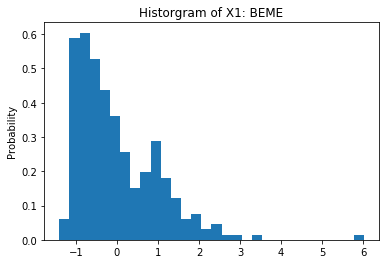

In [61]:
plt.hist(TFM_2014_Q4['X_1'], normed=True, bins=30)
plt.ylabel('Probability')
plt.title("Historgram of X1: BEME")

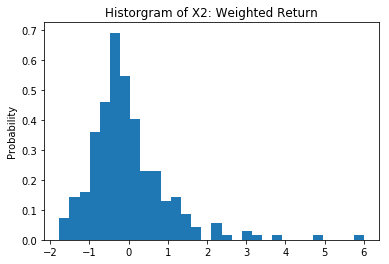

In [62]:
plt.hist(TFM_2014_Q4['X_2'], normed=True, bins=30)
plt.ylabel('Probability')
plt.title("Historgram of X2: Weighted Return")

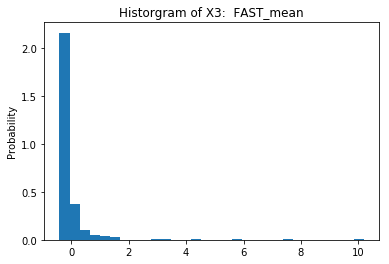

In [63]:
plt.hist(TFM_2014_Q4['X_3'], normed=True, bins=30)
plt.ylabel('Probability')
plt.title("Historgram of X3:  FAST_mean")

In [64]:
def outlier_index(list_name, std_num):
    mean = list_name.mean() # mean
    std = np.std(list_name, axis=0) # standard deviation
    
    upper_b = mean+std_num*std
    lower_b = mean-std_num*std
    
    ind_upper = [i for i in range(len(list_name)) if list_name[i] > upper_b]
    ind_lower = [i for i in range(len(list_name)) if list_name[i] < lower_b]
    outlier_index = ind_upper+ind_lower
    
    return outlier_index

In [65]:
outlier_all = outlier_index(TFM_2014_Q4['X_1'], 5) + outlier_index(TFM_2014_Q4['X_2'], 5)+ outlier_index(TFM_2014_Q4['X_3'], 5)+ outlier_index(TFM_2014_Q4['Y'], 5)

In [67]:
TFM_2014_Q4_NO = TFM_2014_Q4.drop(TFM_2014_Q4.index[outlier_all])

In [71]:
TFM_2014_Q4_NO.to_csv("TFM_2014_Q4_NO.csv")

# ************* Result DataFrame: TFM_2014_Q4_NO.csv *************

### Model Fit (unimportant)

In [59]:
# Model Prep
Y = diff_return_com_csi300_CURRENT
X_1 = norm_BEME_ratio_list
X_2 = norm_diff_csi300_LAST
X_3 = FAST_mean_list

In [60]:
X1_matrix = np.column_stack((X_1, X_2, X_3))

In [63]:
Y1_matrix = np.array(Y)[:,np.newaxis] # matrix Y1: 268*1

In [66]:
# save as csv
pd.DataFrame(X1_matrix).to_csv("X1_test.csv") 
pd.DataFrame(Y1_matrix).to_csv("Y1_test.csv") 